# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import RidgeClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Us9r/DicodingBMLP/main/clustered_data.csv')
df.head()

,Protein(g),Carbs(g),Fat(g),Diet_type_mediterranean,Diet_type_vegan,Cuisine_Group_Amerika,Cuisine_Group_Eropa,Cluster_DBSCAN
0,0.189294,0.183381,0.127850,0.0,1.0,1.0,0.0,0
1,0.170389,0.312330,0.221675,0.0,1.0,1.0,0.0,0
2,0.423952,0.179082,0.417967,0.0,1.0,1.0,0.0,0
3,0.298273,0.578240,0.500000,0.0,1.0,1.0,0.0,0
4,0.584419,0.452396,0.569671,0.0,1.0,1.0,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Protein(g)               2519 non-null   float64
 1   Carbs(g)                 2519 non-null   float64
 2   Fat(g)                   2519 non-null   float64
 3   Diet_type_mediterranean  2519 non-null   float64
 4   Diet_type_vegan          2519 non-null   float64
 5   Cuisine_Group_Amerika    2519 non-null   float64
 6   Cuisine_Group_Eropa      2519 non-null   float64
 7   Cluster_DBSCAN           2519 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 157.6 KB


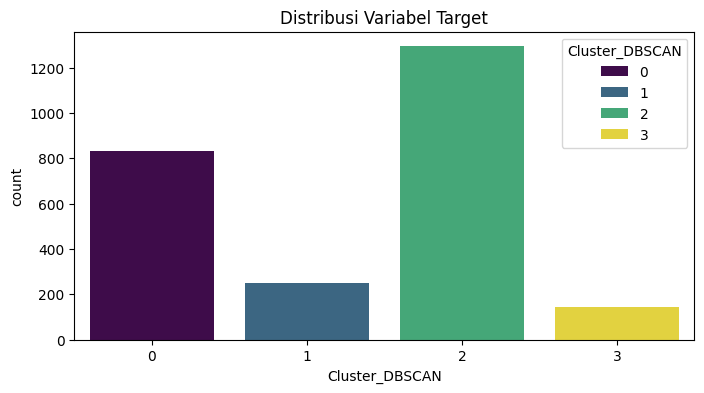

In [4]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster_DBSCAN', hue='Cluster_DBSCAN', data=df, palette='viridis', legend=True)
plt.title('Distribusi Variabel Target')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:

X = df.drop(['Cluster_DBSCAN'], axis=1)
y = df['Cluster_DBSCAN']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

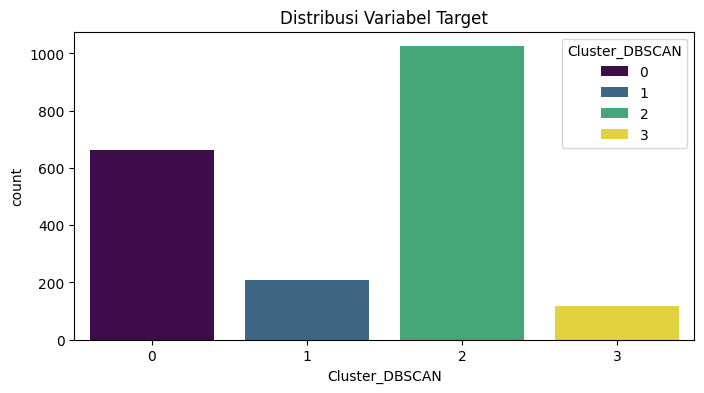

In [7]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, hue=y_train, data=X_train, palette='viridis', legend=True)
plt.title('Distribusi Variabel Target')
plt.show()

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [10]:
# Predictions for each model
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)
nb_pred = nb.predict(X_test)

In [11]:
# Function to evaluate a model
def evaluate_model(y_true, y_pred, model_name):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')

  print(f"Evaluation Metrics for {model_name}:")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print("-" * 30)

# Evaluate each model
evaluate_model(y_test, knn_pred, "K-Nearest Neighbors")
evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, svm_pred, "Support Vector Machine")
evaluate_model(y_test, nb_pred, "Naive Bayes")

Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
------------------------------
Evaluation Metrics for Decision Tree:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
------------------------------
Evaluation Metrics for Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
------------------------------
Evaluation Metrics for Support Vector Machine:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
------------------------------
Evaluation Metrics for Naive Bayes:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
------------------------------


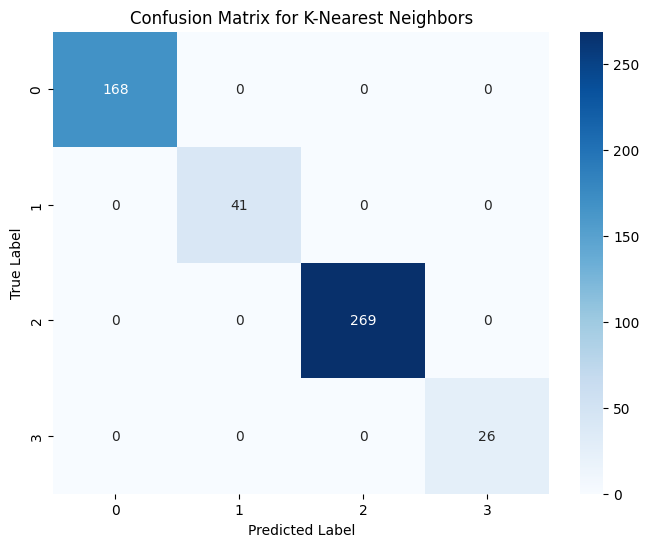

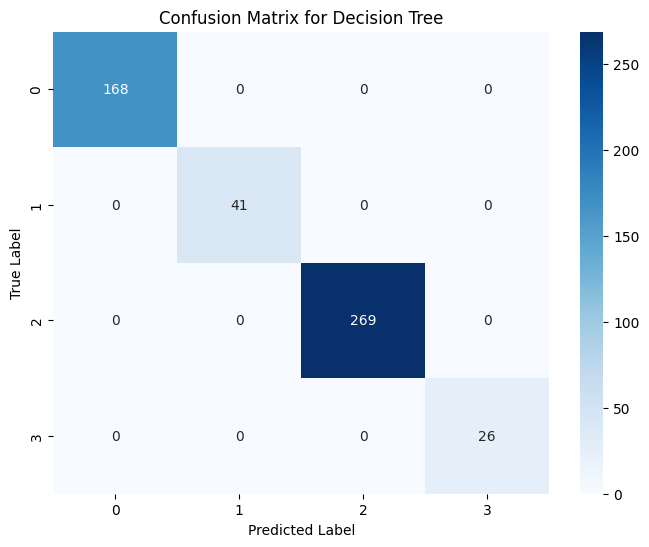

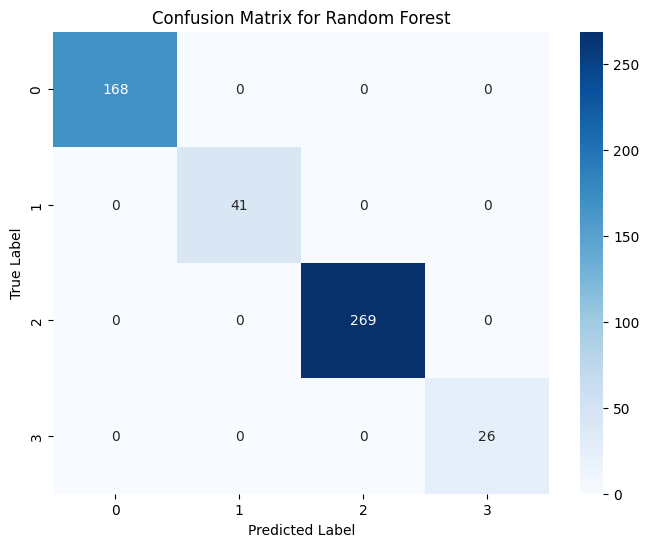

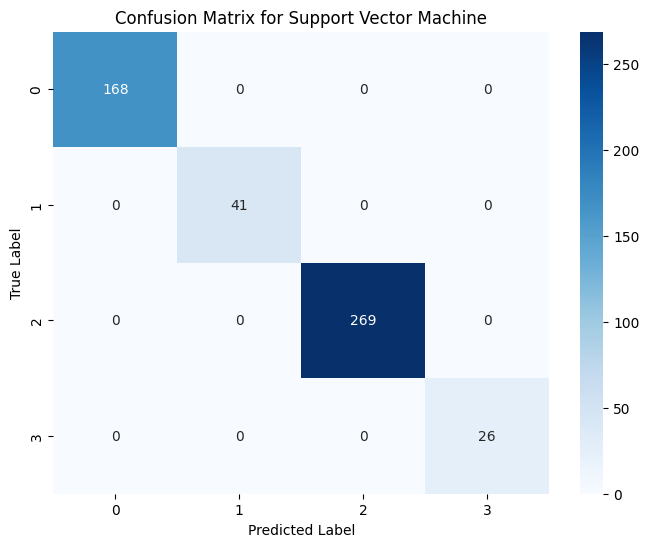

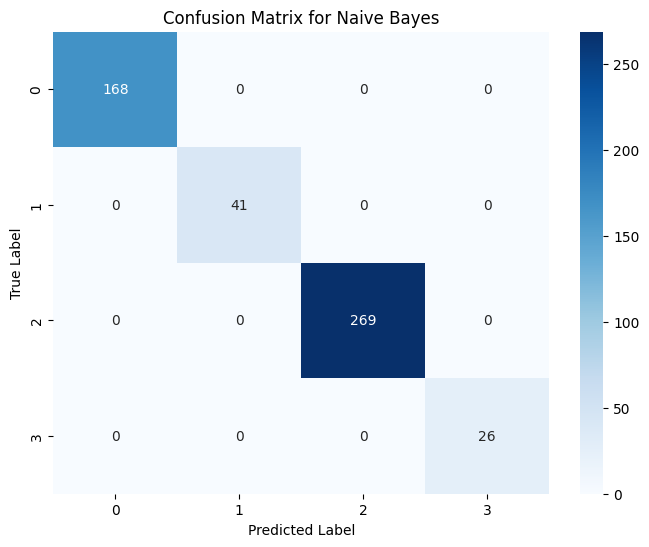

In [12]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.title(f"Confusion Matrix for {model_name}")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(y_test, knn_pred, "K-Nearest Neighbors")
plot_confusion_matrix(y_test, dt_pred, "Decision Tree")
plot_confusion_matrix(y_test, rf_pred, "Random Forest")
plot_confusion_matrix(y_test, svm_pred, "Support Vector Machine")
plot_confusion_matrix(y_test, nb_pred, "Naive Bayes")

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [13]:
ridge_classifier = RidgeClassifier(alpha=1.0) # nilai default alpha
ridge_classifier.fit(X_train, y_train) # melatih model

ridge_pred = ridge_classifier.predict(X_test) # melakukan prediksi

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [14]:
evaluate_model(y_test, ridge_pred, "Ridge Classifier")

Evaluation Metrics for Ridge Classifier:
Accuracy: 0.9484
Precision: 0.8999
Recall: 0.9484
F1-Score: 0.9234
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


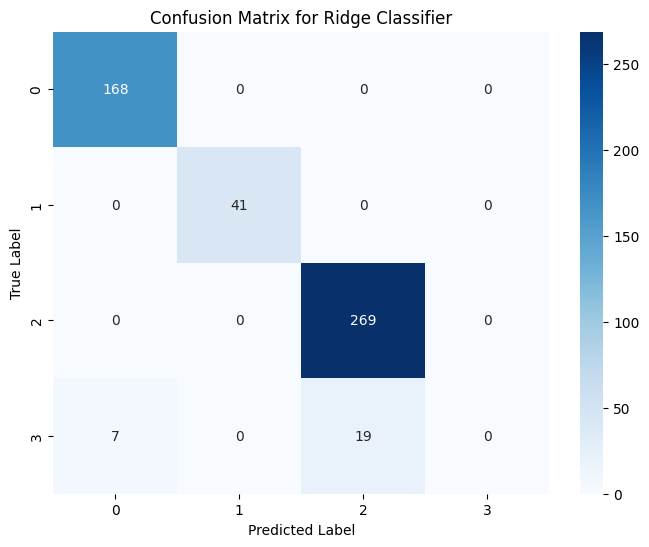

In [15]:
plot_confusion_matrix(y_test, ridge_pred, "Ridge Classifier")

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Overfitting pada model awal
kesemua model yang diimplementasikan mengalami overfitting. ini kemungkinan terjadi karena fitur Diet_type_mediterranean, Diet_type_vegan, Cuisine_group_amerika, Cuisine_group_eropa sangat berpengaruh terhadap pembentukan cluster sebelumnya.

2. Penerapan L2 Regularization (Ridge)
Dengan menggunakan L2 regularization, model menjadi lebih general dan tidak terlalu terpengaruh oleh fitur-fitur dominan yang dapat menyebabkan overfitting. Hasil evaluasi untuk Ridge Classifier menunjukkan penurunan dalam semua metrik, tetapi ini bisa dianggap sebagai hal yang positif karena model menjadi lebih robust dan mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

3. Rekomendasi
Rekomendasi yang dapat dilakukan selanjutnya adalah mengurangi kompleksitas dataset awal bahkan sebelum clustering. itur-fitur seperti Diet_type_mediterranean, Diet_type_vegan, Cuisine_group_amerika, Cuisine_group_eropa mungkin terlalu berpengaruh dalam pengelompokan dan klasifikasi